# Geometric Transformations 

## Import Libraries 

In [2]:
import cv2
## import other needed libraries ##
##... CODE HERE ...##
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Read Images

In [5]:
## read all the images ##
##... CODE HERE ...##
image_1 = cv2.imread("Team_15_Image_01.png")
image_2 = cv2.imread("Team_15_Image_02.jpg")

## Show Images 

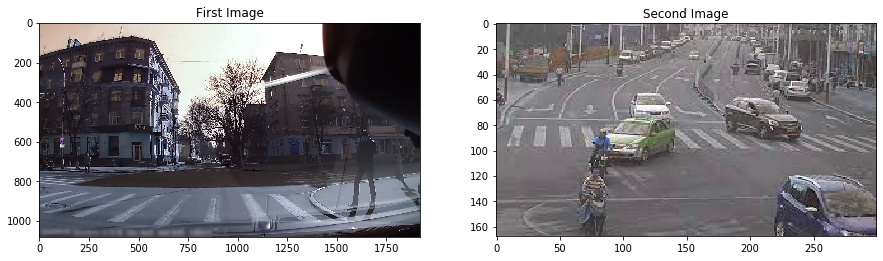

In [4]:
## show all images ##
##... CODE HERE ...##
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (15,15))
ax1.imshow(image_1);
ax1.set_title('First Image');
ax2.imshow(image_2);
ax2.set_title('Second Image');

In [52]:
rows, cols = image_1.shape[:2]

## Image Translation 

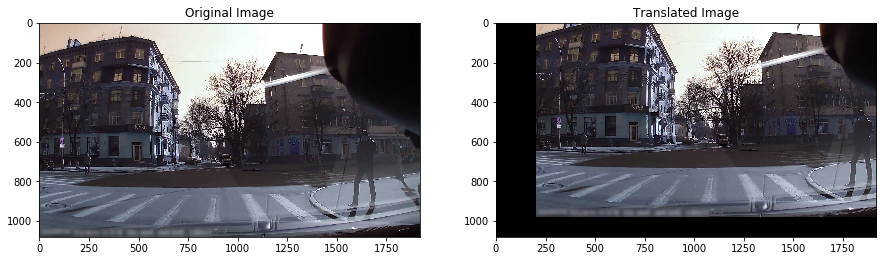

In [53]:
## for the RGB image perform the translation with a positive ##
## factor in x and negative factor in y axes ##
## note that you have to use several interpolation methods for comparison ##
##... CODE HERE ...##
height = image_1.shape[0]
width = image_1.shape[1]
matrix = np.float32([[1, 0, 200], [0, 1, -100]])
translated_img = cv2.warpAffine(image_1, matrix, (image_1.shape[1],image_1.shape[0]),cv2.INTER_LINEAR)

## show the original and the translated image ##
##... CODE HERE ...##
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (15,15))
ax1.imshow(image_1);
ax1.set_title('Original Image');
ax2.imshow(translated_img);
ax2.set_title('Translated Image');
## save the translated image ##
##... CODE HERE ...##
cv2.imwrite('Translation.png', translated_img);

## Image Scaling

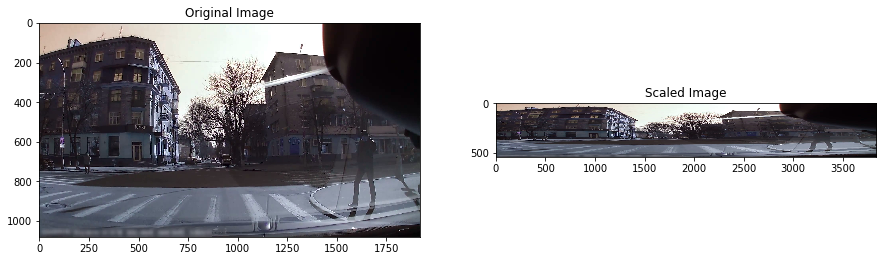

In [57]:
## for the RGB image perform the scaling with a positive ##
## factor in x and negative factor in y axes##
## note that you have to use several interpolation methods for comparison ##
##... CODE HERE ...##
scale_col = 2
scale_row = 0.5
scaled_img_linear = cv2.resize(image_1, (int(image_1.shape[1]*scale_col), int(image_1.shape[0]*scale_row)), cv2.INTER_LINEAR)
scaled_img_cubic = cv2.warpAffine(image_1, matrix, (cols,rows), cv2.INTER_CUBIC)
scaled_img_nearest = cv2.warpAffine(image_1, matrix, (cols,rows), cv2.INTER_NEAREST)
## show the original and the scaled image ##
##... CODE HERE ...##
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (15,15))
ax1.imshow(image_1);
ax1.set_title('Original Image');
ax2.imshow(scaled_img_linear);
ax2.set_title('Scaled Image');
## save the scaled image ##
##... CODE HERE ...##
cv2.imwrite('Scaled.png', scaled_img_linear);


## Image Rotation

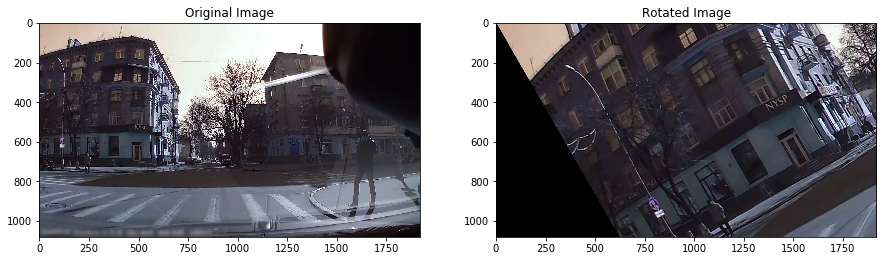

In [63]:
## for the RGB image perform the rotation with a positive angle ##
## note that you have to use several interpolation methods for comparison ##
##... CODE HERE ...##
center = (0,0)
M = cv2.getRotationMatrix2D(center, 30, 2.0)

rotated_linear = cv2.warpAffine(image_1, M, (cols, rows),cv2.INTER_LINEAR)

rotated_cubic = cv2.warpAffine(image_1, M, (cols,rows), cv2.INTER_CUBIC)

rotated_nearest = cv2.warpAffine(image_1, M, (cols,rows), cv2.INTER_NEAREST)

## show the original and the rotated image ##
##... CODE HERE ...##
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (15,15))
ax1.imshow(image_1);
ax1.set_title('Original Image');
ax2.imshow(rotated_linear);
ax2.set_title('Rotated Image');
## save the rotated image ##
##... CODE HERE ...##
cv2.imwrite('Rotated.png', rotated_linear);

## Image Shearing

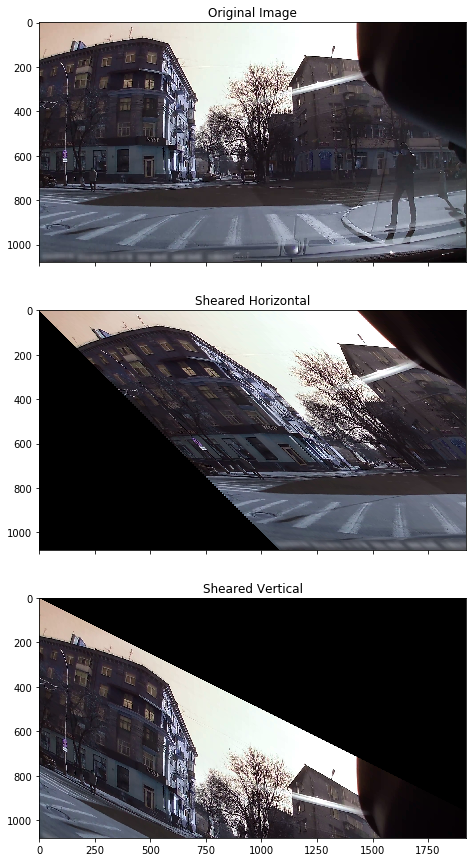

In [86]:
## for the RGB image perform the shearing with a positive ##
## factor in x and negative factor in y axes##
## note that you have to use several interpolation methods for comparison ##
#... CODE HERE ...##
M_H = np.float32([[1, 1, 0],[0, 1  , 0],[0, 0  , 1]])
M_V = M = np.float32([[1,   0, 0],[0.5, 1, 0],[0,   0, 1]])
Hshear_img = cv2.warpPerspective(image_1,M_H,(cols,rows))
Vshear_img = cv2.warpPerspective(image_1,M_V,(cols,rows))
## show the original and the sheared image ##
##... CODE HERE ...##
fig, axs = plt.subplots(3, figsize = (15,15),sharex=True, sharey=True)
# fig.suptitle('Sharing both axes')
axs[0].imshow(image_1);
axs[0].set_title("Original Image");
axs[1].imshow(Hshear_img);
axs[1].set_title("Sheared Horizontal");
axs[2].imshow(Vshear_img);
axs[2].set_title("Sheared Vertical");
## save the sheared image ##
##... CODE HERE ...##

## Composite Affine Transformation 

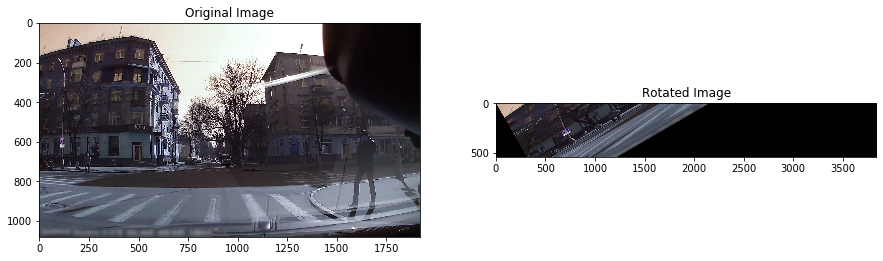

In [87]:
## for the RGB image perform composite affine transformation ##
## with a combination of translation, rotation and scaling done in the previous sections ##
## note that you have to use several interpolation methods for comparison ##
##... CODE HERE ...##
#  Translation

matrix_trans = np.float32([[1, 0, 200], [0, 1, -100]])
translated_img = cv2.warpAffine(image_1, matrix, (image_1.shape[1],image_1.shape[0]),cv2.INTER_LINEAR)

# Scaling the Image :

scale_col = 2
scale_row = 0.5
scaled_img_linear = cv2.resize(image_1, (int(translated_img.shape[1]*scale_col), int(translated_img.shape[0]*scale_row)), cv2.INTER_LINEAR)
# scaled_img_cubic = cv2.warpAffine(translated_img, matrix, (cols,rows), cv2.INTER_CUBIC)
# scaled_img_nearest = cv2.warpAffine(translated_img, matrix, (cols,rows), cv2.INTER_NEAREST)

# Rotating

center = (0,0)
M = cv2.getRotationMatrix2D(center, 30, 2.0)

rotated_linear_a = cv2.warpAffine(scaled_img_linear, M, (scaled_img_linear.shape[1], scaled_img_linear.shape[0]),cv2.INTER_LINEAR)
## show the original and the fully transformed image ##
##... CODE HERE ...##
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (15,15))
ax1.imshow(image_1);
ax1.set_title('Original Image');
ax2.imshow(rotated_linear_a);
ax2.set_title('Rotated Image');
## save the fully transformed image ##
##... CODE HERE ...##

## Live Camera

In [6]:
## Capture a video and perform any of the transformations stated previously on the captured video ##
## ... CODE HERE ...##
cap = cv2.VideoCapture(0)
while True:                                                      # Load the input frame and write output frame.
    ret, img = cap.read()   
    if not ret:                                                  # Check if frame present otherwise he break the while loop
        break
    ## Convert to Grayscale
    frame_read = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    height = img.shape[0]
    width = img.shape[1]
    matrix = np.float32([[1, 0, 200], [0, 1, -100]])
    translated_img = cv2.warpAffine(img, matrix, (img.shape[1],img.shape[0]),cv2.INTER_LINEAR)
    ## Plot the histogram and show the live video
    fig, ax = plt.subplots(figsize=(10,6))
    plt.grid()
    plt.legend(['Original', 'Translated'],fontsize='x-large')
    plt.xlabel('Frames',size=10)
    plt.savefig('i.png')
    plt.close()
    frame_curve=cv2.imread('i.png')
    cv2.imshow('Original Image', img)
    cv2.imshow('Equalized Image', translated_img)
#     cv2.imshow('Histogram', frame_curve)
    
    ## Press the enter key to exit the video
    if cv2.waitKey(1) == 13: #13 Enter Key
        break

cap.release()                                             # For releasing cap and out. 
cv2.destroyAllWindows()

## Thank you :)